# Monte Carlo Simulation Variance Reduction Method -- Antithetic Variates
### Thomas Polstra, PhD

##### [GitHub](https://github.com/thomaspolstra/Quant_Materials_Polstra_Public.git) -- [Academic Website](https://thomaspolstra.github.io/) -- [Email](mailto:thomaspolstra@gmail.com)

## Antithetic Variates Method in Monte Carlo Simulations

### Introduction
The antithetic variates method is a variance reduction technique used in Monte Carlo simulations to improve the accuracy and efficiency of estimation by reducing the variability of the results. 

### Basic Idea
The key idea behind the antithetic variates method is to introduce negatively correlated variables into the simulation. This involves simulating pairs of variables in such a way that when one variable's outcome is higher than expected, the other's outcome is lower than expected, and vice versa. This helps in canceling out some of the randomness and variability.

### Application: Simultaneously Buying Calls on Negatively Correlated Assets
One specific application of the antithetic variates method is in option trading strategies involving negatively correlated assets. Let's consider the scenario where you're interested in buying call options on two assets that have a negative correlation. The steps would be as follows:

1. **Asset Selection**: Choose two assets that have a negative correlation. For instance, you could choose assets from different sectors or industries that tend to move in opposite directions.

2. **Option Specifications**: Specify the parameters for the call options, such as the strike price, time to expiration, and volatility.

3. **Generate Correlated Pairs**: Simulate pairs of correlated price changes for the two assets. Ensure that when one asset's price increases, the other's price decreases, and vice versa.

4. **Option Payoffs**: Calculate the payoffs for the call options based on the simulated price changes of the correlated assets.

5. **Estimation**: Estimate the option prices using the average of the call option payoffs and discount them to the present value.

### Benefits
The antithetic variates method offers several benefits:

- **Reduced Variance**: By introducing negatively correlated variables, the method reduces the overall variance of the simulation results.

- **Efficiency**: Improved estimation efficiency allows for accurate results with fewer simulation runs.

- **Consistency**: The antithetic variates method maintains the expected value of the estimate, ensuring that the simulation remains unbiased.

In [1]:
#Load definitions and packages
%run Preamble.py

In the following, paths_positive and paths_negative are simulated geometric Brownian motion paths of two perfectly negatively correlated assets with the same strike price and volatility.

In [2]:
# Parameters
S = 100   # Stock price S_{0}
K = 95  # Strike
T = 252/252  # Time to maturity
r = 0.05  # Risk-free rate in annual %
q = 0  # Annual dividend rate
sigma = 0.32  # Annual volatility
steps = 1  # Time steps set to one to estimate the price of the option
N = 10000  # Number of trials

# Simulate asset price paths using antithetic variates
paths_positive = geo_paths(S, T, sigma, steps, N, r=0.05)
paths_negative = geo_paths(S, T, sigma, steps, N, r=-0.05)  # Negatively correlated path

# Calculate payoffs for call options on positive and negative paths
payoffs_positive = np.maximum(paths_positive[-1] - K, 0)
payoffs_negative = np.maximum(paths_negative[-1] - K, 0)


#combined_path
payoffs_combined = (payoffs_positive + payoffs_negative)*.5


#Find standard error
SE1 = standard_error(payoffs_positive,r,T)
SE2 = standard_error(payoffs_negative,r,T)
SE3 = standard_error(payoffs_combined,r,T)

# Find percentage of in-the-money-paths
P1 = per_in_money_paths(payoffs_positive)
P2 = per_in_money_paths(payoffs_negative)
P3 = per_in_money_paths(payoffs_combined)


price1 = np.mean(payoffs_positive) * np.exp(-r * T)
price2 = np.mean(payoffs_negative) * np.exp(-r * T)
combined_option_price = (np.mean(payoffs_combined)) * np.exp(-r * T)


# Display results
print(f"Monte Carlo value of owning positive call: {price1:.2f} with standard error {SE1:.6f}")
print(f"Percentage of simulated paths that are in-the-money: {P1:.2f}")

print('---------')

print(f"Monte Carlo value of owning a negative call: {price2:.2f} with standard error {SE2:.6f}")
print(f"Percentage of simulated paths that are in-the-money: {P2:.2f}")

print('---------')
print(f"Monte Carlo value of owning a both calls: {combined_option_price:.2f} with standard error {SE3:.6f}")
print(f"Percentage of simulated paths that are in-the-money: {P3:.2f}")

Monte Carlo value of owning positive call: 17.59 with standard error 0.271231
Percentage of simulated paths that are in-the-money: 0.56
---------
Monte Carlo value of owning a negative call: 11.47 with standard error 0.216578
Percentage of simulated paths that are in-the-money: 0.44
---------
Monte Carlo value of owning a both calls: 14.53 with standard error 0.174309
Percentage of simulated paths that are in-the-money: 0.75


### Visualizing the variance of the two call option Monte-Carlo Simulation

The following graph contains the normal distributions of prices that the Monte-Carlo simulation produces for the three option strategies above. The graphs allow us to visually observe less variance in the Monte-Carlo simulation of buying calls in negatively correlated assets.

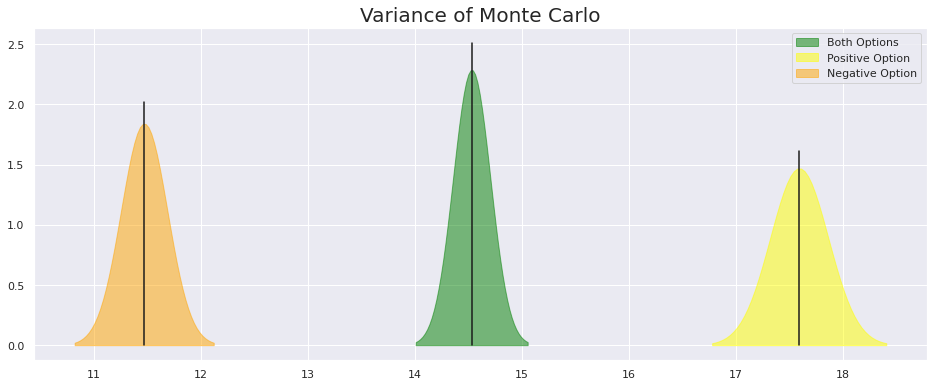

In [3]:
plot_mc_sim([payoffs_combined, payoffs_positive, payoffs_negative], ['green','yellow','orange'],
            ['Both Options', 'Positive Option', 'Negative Option'],r,T,'Variance of Monte Carlo')

### Discussion of simulation and implications to investing

The benefit of holding calls on negatively correlated assets lies in its ability to lower variance in Monte Carlo simulations, resulting in more precise simulations. This becomes especially valuable when evaluating strategies across extensive portfolios. However, a significant drawback accompanies this approach: finding two negatively correlated stocks can be quite the challenge.

## Application: Straddle option strategy

We now consider a natural, and often time available option strategy; the **straddle strategy**: The investor will simutaneously buy a call and put options on an underlying asset (or correlated assets) at different strike prices. An option and a put on correlated assets will have a negative correlation and so our Monte-Carlo simulation of combined price of an option and a put should have less variance for the same reason that buying calls on negatively correlated assets.

In the following analysis, we conduct a Monte Carlo simulation to explore the strategy of simultaneously purchasing a call option while also selling a call option on the same asset, albeit with a higher strike price, i.e. a straddle/strangle option strategy.

In [4]:
# Parameters
S = 100  # Stock price S_{0}
K1 = 90  # Put strike
K2 = 110  # Call strike
T = 100 / 252  # Time to maturity
r = 0.05  # Risk-free rate in annual %
q = 0  # Annual dividend rate
sigma = 0.19  # Annual volatility
steps = 1  # Time steps set to one to estimate the price of the option
N = 10000  # Number of trials

# Simulate asset price paths for positive correlation
paths = geo_paths(S, T, sigma, steps, N, r=0.05)
call_prices = np.maximum(paths[-1] - K1, 0)
put_prices = np.maximum(-paths[-1] + K2, 0)
straddle_prices = (put_prices+call_prices)*.5


# Average prices
put_price = np.mean(put_prices)
call_price = np.mean(call_prices)
straddle_price = (put_price + call_price)*.5

# Discount the average payoffs to present values
straddle_price = straddle_price * np.exp(-r * T)
call_price = call_price * np.exp(-r * T)
put_price = put_price * np.exp(-r * T)



# Calculate percentage of in-the-money paths for options
put_percentage = per_in_money_paths(put_prices)
call_percentage = per_in_money_paths(call_prices)
straddle_percentage = per_in_money_paths(straddle_prices)



# Find standard error for straddle monte carlo sim
SE0 = standard_error(straddle_prices,r,T)

# Find standard error for put monte carlo sim
SE1 = standard_error(put_prices,r,T)

SE2 = standard_error(call_prices,r,T)

# Display results bull call monte carlo
print(f"Monte Carlo value of straddle: {straddle_price:.2f} with standard error {SE0:.6f}")
print(f"Percentage of Monte Carlo straddle in-the-money paths: {straddle_percentage * 100:.2f}%")
print('----------------')
print(f"Monte Carlo value of put: {put_price:.2f} with standard error {SE1:.6f}")
print(f"Percentage of Monte Carlo option 1 payoff paths: {put_percentage*100:.2f}%")
print('----------------')
print(f"Monte Carlo value of call: {call_price:.2f} with standard error {SE2:.6f}")
print(f"Percentage of Monte Carlo option 2 payoff paths: {call_percentage * 100:.2f}%")


Monte Carlo value of straddle: 11.28 with standard error 0.027811
Percentage of Monte Carlo straddle in-the-money paths: 100.00%
----------------
Monte Carlo value of put: 9.79 with standard error 0.092360
Percentage of Monte Carlo option 1 payoff paths: 75.15%
----------------
Monte Carlo value of call: 12.77 with standard error 0.111168
Percentage of Monte Carlo option 2 payoff paths: 83.63%


The Monte Carlo simulation of the straddle strategy exhibits a notably lower standard error compared to the simulations of individual call and put options (especially considering the predicted value of the straddle position is significantly larger than the position of owning only one of the two options). Consequently, this lower standard error contributes to more precise pricing, consistent profit estimation, and mitigated losses in future investments. We conclude with a visualization of our findings:

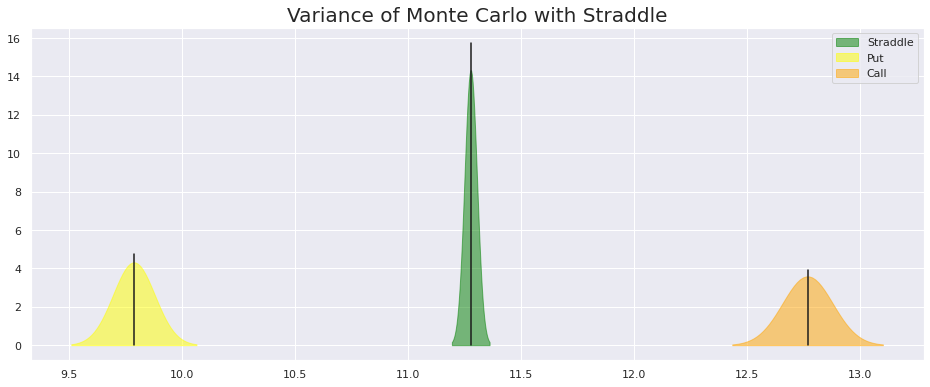

In [5]:
plot_mc_sim([straddle_prices, put_prices, call_prices], ['green','yellow','orange'],
            ['Straddle', 'Put', 'Call'],r,T,'Variance of Monte Carlo with Straddle')